# Lab: Even More Linear Regression
## CMSE 381 - Spring 2024

In recent lectures, we have focused on linear regression, that is, fitting models of the form 
$$
Y =  \beta_0 +  \beta_1 X_1 +  \beta_2 X_2 + \cdots +  \beta_pX_p + \varepsilon
$$
In this lab, we will continue to use two different tools for linear regression. 
- [Scikit learn](https://scikit-learn.org/stable/index.html) is arguably the most used tool for machine learning in python 
- [Statsmodels](https://www.statsmodels.org) provides many of the statisitcial tests we've been learning in class

This lab will cover two ideas: 
- Categorical variables and how to represent them as dummy variables. 
- How to build interaction terms and pass them into your favorite model.

In [2]:
# As always, we start with our favorite standard imports. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf

# Q1: Hypothesis Test

&#9989; **<font color=red>Do this:</font>** Use the `statsmodels` package to fit the model 
$$
\texttt{Sales} = \beta_0 + \beta_1 \cdot \texttt{TV} + \beta_2\cdot \texttt{Radio} + \beta_3\cdot \texttt{Newspaper}
$$
What is the equation for the model learned

In [ ]:
# Your code here

&#9989; **<font color=red>Do this:</font>** Use the `summary` command for the trained model class to determine the F-statistic for this model. 
- What are the null and alternative hypotheses for the test this statistic is used for? 
- What is your conclusion of the test given this F-score?

# Q2: Subsets of variables

&#9989; **<font color=red>Q:</font>** List all 6 subsets of the three variables being used. 

*Your answer here*

&#9989; **<font color=red>Do this:</font>** Below is a command to get the RSS for the statsmodel linear fit. For each of the subsets listed above, what is the RSS for the learned model? Which is smallest? 

In [3]:
def statsmodelRSS(est):
    # Returns the RSS for the statsmodel ols class
    return np.sum(est.resid**2)

In [ ]:
# Your code here

# Q3: Making predictions



In [4]:
advertising_df = pd.read_csv('Advertising.csv', index_col = 0)
# I need to sort the rows by TV to make plotting work better later 
advertising_df= advertising_df.sort_values(by=['TV'])
advertising_df.head()

,TV,Radio,Newspaper,Sales
131,0.7,39.6,8.7,1.6
156,4.1,11.6,5.7,3.2
79,5.4,29.9,9.4,5.3
57,7.3,28.1,41.4,5.5
127,7.8,38.9,50.6,6.6


In [5]:
# I want to just learn Sales using TV
est = smf.ols('Sales ~ TV', advertising_df).fit()
est.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [6]:
# Here is a table giving us the CI and PI information 
# alpha = 0.1
alpha = 0.05
# alpha = 0.01
# alpha = 0.001
advert_summary = est.get_prediction(advertising_df).summary_frame(alpha=alpha)
advert_summary.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7.065869,0.456216,6.166202,7.965536,0.577070,13.554668
1,7.227494,0.448345,6.343350,8.111637,0.740829,13.714159
2,7.289291,0.445348,6.411058,8.167525,0.803429,13.775153
3,7.379611,0.440981,6.509989,8.249233,0.894909,13.864313
4,7.403379,0.439835,6.536018,8.270741,0.918981,13.887778


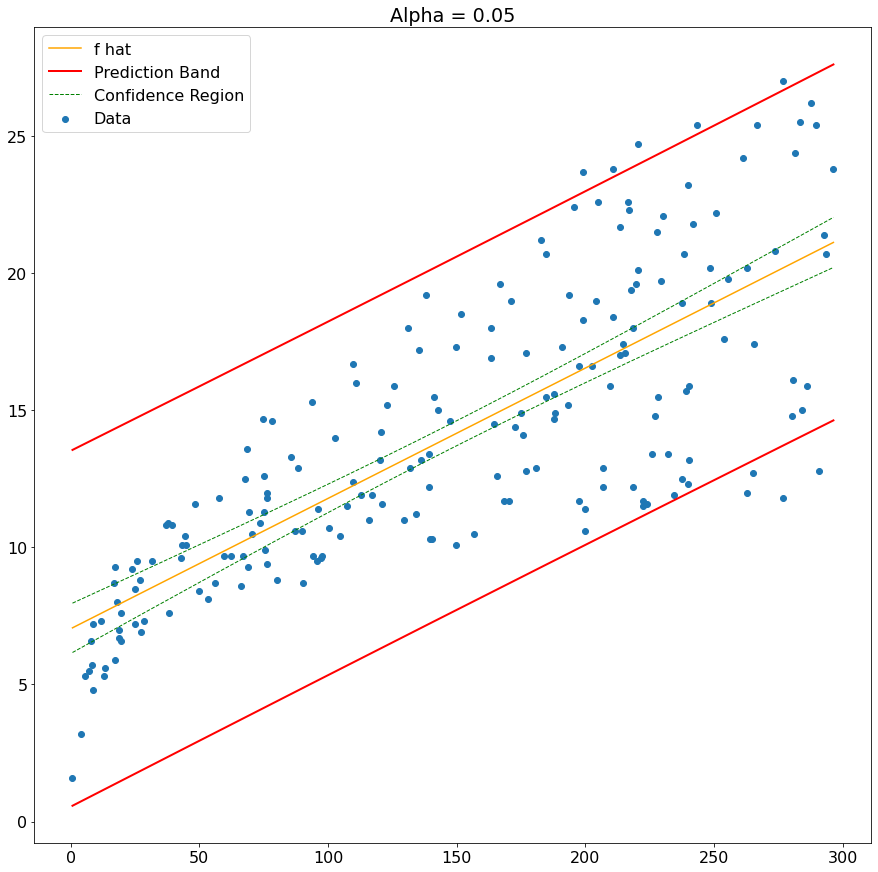

In [7]:
# And here is some code that will draw these beasts for us....
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['font.size'] = 16


x = advertising_df['TV']
y = advertising_df['Sales']


# Plot the original data 
plt.scatter(x,y, label = 'Data')

# Plot the fitted values, AKA f_hat
# you can get this in two different places, same answer
# plt.plot(x,advert_summary['mean'], color = 'orange', label = 'f hat')
plt.plot(x,est.fittedvalues, color = 'orange', label = 'f hat')



plt.plot(x,advert_summary['obs_ci_lower'], 'r', lw=2, 
         label = r'Prediction Band')
plt.plot(x,advert_summary['obs_ci_upper'], 'r', lw=2)

plt.plot(x, advert_summary['mean_ci_lower'],'g--', lw=1, 
         label = r'Confidence Region')
plt.plot(x, advert_summary['mean_ci_upper'], 'g--', lw=1)

plt.title('Alpha = '+ str(alpha))



plt.legend()

# Q4 Playing with multi-level variables 

## The wrong way

Ok, we're going generate dummy variable incorrectly to start. Pull in the `Auto` data set. You were so proud of yourself for remembering to fix the problems with the `horsepower` column that you conveniently forgot that the column with information about country of origin (`origin`) has a bunch of integers in it, representing:
- 1: `American`
- 2: `European`
- 3: `Japanese`.

In [8]:
Auto_df = pd.read_csv('Auto.csv')
Auto_df = Auto_df.replace('?', np.nan)
Auto_df = Auto_df.dropna()
Auto_df.horsepower = Auto_df.horsepower.astype('int')


Auto_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

You then go on your merry way building the model 
$$
\texttt{mpg} = \beta_0 + \beta_1 \cdot \texttt{origin}. 
$$

In [ ]:
from sklearn.linear_model import LinearRegression

X = Auto_df.origin.values
X = X.reshape(-1, 1)
y = Auto_df.mpg.values

regr = LinearRegression()

regr.fit(X,y)

print('beta_1 = ', regr.coef_[0])
print('beta_0 = ', regr.intercept_)

&#9989; **<font color=red>Q:</font>** What does your model predict for each of the three types of cars? 

In [ ]:
# Your code here

&#9989; **<font color=red>Q:</font>** Is it possible for your model to predict that both American and Japanese cars have `mpg` below European cars? 

Your answer here.

## The right way

Ok, so you figure out your problem and decide to load in your data and fix the `origin` column to have names as entries.

In [ ]:
convertOrigin= {1: 'American', 2:'European', 3:'Japanese'}

# This command swaps out each number n for convertOrigin[n], making it one of
# the three strings instead of an integer now.
Auto_df.origin = Auto_df.origin.apply(lambda n: convertOrigin[n])
Auto_df

Below is a quick code that automatically generates our dummy variables. Yay for not having to code that mess ourselves!

In [9]:
origin_dummies_df = pd.get_dummies(Auto_df.origin, prefix='origin')
origin_dummies_df

,origin_1,origin_2,origin_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
392,1,0,0
393,0,1,0
394,1,0,0
395,1,0,0


&#9989; **<font color=red>Q:</font>** What is the interpretation of each column in the `origin_dummies_df` data frame?

*Your answer here*

I pass these new dummy variables into my `scikit-learn` linear regression model and get the following coefficients

In [10]:
X = origin_dummies_df.values
y = Auto_df.mpg

regr = LinearRegression()

regr.fit(X,y)

print('Coefs = ', regr.coef_)
print('Intercept = ', regr.intercept_)

NameError: name 'LinearRegression' is not defined

&#9989; **<font color=red>Q:</font>** Now what does your model predict for each of the three types of cars? 

In [ ]:
# Your code here

### Ooops

&#9989; **<font color=red>Q:</font>** Awww, we didn't quite do what we said for the dummy variables in class. We talked about having only two dummy variables for a three level variable. Modify the above code to fix it to have two variables instead of three. 
- Are your coefficients different now?
- Are your predictions for each of the three origins different now? 
- Does it matter which two levels you used for your dummy variables? 

In [ ]:
# Your code here

## Another right way

Ok, fine, I'll cave, I made you do it the hard way but you got to see how the innards worked, so maybe it's not all bad ;) 

The following code does the same thing as above, but because `statsmodels` has built in tools to handle categorical variables in a data frame, it does the hard work for you. 

In [ ]:
est = smf.ols('mpg ~ origin', Auto_df).fit()
est.summary().tables[1]

&#9989; **<font color=red>Q:</font>** What is the model learned from the above printout? Be specific in terms of your dummy variables. 

Your answer here

# Q5 Interaction Terms 

Below is the code used for generating the tables shown on the slides. 

In [ ]:
Advertising_df = pd.read_csv('Advertising.csv', index_col = 0)
Advertising_df.head()

In [ ]:
Advertising_df['TVxRadio'] = Advertising_df.TV * Advertising_df.Radio
Advertising_df.head()

In [ ]:
est = smf.ols('Sales ~ TV + Radio + TVxRadio', Advertising_df).fit()
est.summary().tables[1]

&#9989; **<font color=red>Do this:</font>** Using the Auto data set, train the model 
$$
\texttt{mpg} = \beta_0 + \beta_1\cdot \texttt{weight} + \beta_2\cdot \texttt{horsepower} + \beta_3\cdot \texttt{weight x horsepower}.
$$
Is the interaction term adding value to the model? 

In [ ]:
# Your code here



-----
### Congratulations, we're done!

Written by Dr. Liz Munch, Modified by Dr. Rongrong Wang Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.